In [157]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [138]:
df = pd.read_csv('C:/Users/ASUS/OneDrive/文件/semester 4/Artificial intelligence/HepatitisCdata.csv')

In [139]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


memeriksa jumlah duplikasi

In [140]:
print("Jumlah duplikasi:", df.duplicated().sum())
df = df.drop_duplicates()

Jumlah duplikasi: 0


Missing value

In [141]:
nan_data = df[df.isna().any(axis=1)]
nan_data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
121,122,0=Blood Donor,43,m,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0
319,320,0=Blood Donor,32,f,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
329,330,0=Blood Donor,33,f,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
413,414,0=Blood Donor,46,f,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
424,425,0=Blood Donor,48,f,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
433,434,0=Blood Donor,48,f,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
498,499,0=Blood Donor,57,f,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
540,541,1=Hepatitis,38,m,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63.0
541,542,1=Hepatitis,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
545,546,1=Hepatitis,29,m,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0


In [142]:
df = df.dropna()
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


visualisasi data

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

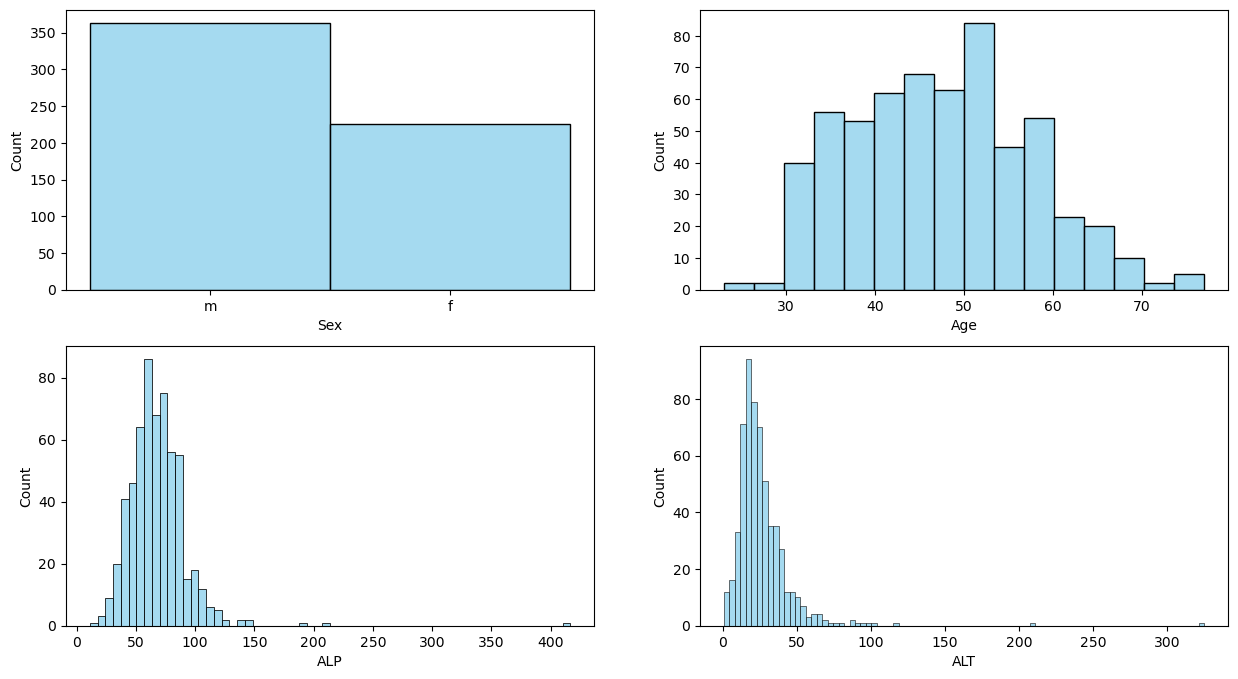

In [143]:
fig, axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=df,x='Sex',ax=axes[0,0],color='skyblue')
sns.histplot(data=df,x='Age',ax=axes[0,1],color='skyblue')
sns.histplot(data=df,x='ALP',ax=axes[1,0],color='skyblue')
sns.histplot(data=df,x='ALT',ax=axes[1,1],color='skyblue')
plt.show()

normalisasi data

In [144]:
from sklearn.preprocessing import MinMaxScaler

In [145]:
data = [[39, 53], [39, 70], [47, 75], [34, 46]]
scaler = MinMaxScaler()
scaler.fit(data)
print(scaler.transform(data))

[[0.38461538 0.24137931]
 [0.38461538 0.82758621]
 [1.         1.        ]
 [0.         0.        ]]


skewness distribution

In [146]:
data = {'ALB': [39, 39, 47, 34, 39, 32], 'ALP': [53, 70, 75, 46, 51, 416], 'ALT': [8, 18, 36, 15, 20, 6]}
df = pd.DataFrame(data)

In [147]:
skewness = df.skew()
print("Skewness untuk setiap kolom:")
print(skewness)

Skewness untuk setiap kolom:
ALB    0.674166
ALP    2.416477
ALT    1.096863
dtype: float64


Train-Test Split
Train-test split adalah metode dasar untuk membagi dataset menjadi dua bagian: satu bagian untuk melatih model dan satu bagian lagi untuk menguji model.

In [148]:
x = loan_data.drop('CHE', axis=1)
y = loan_data['Category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, stratify= y, random_state=42)

In [149]:
x_train.shape, x_test.shape

((492, 13), (123, 13))

In [150]:
y_train.value_counts(normalize=True)

Category
0=Blood Donor             0.865854
3=Cirrhosis               0.048780
1=Hepatitis               0.038618
2=Fibrosis                0.034553
0s=suspect Blood Donor    0.012195
Name: proportion, dtype: float64

In [151]:
y_test.value_counts(normalize=True)

Category
0=Blood Donor             0.869919
3=Cirrhosis               0.048780
1=Hepatitis               0.040650
2=Fibrosis                0.032520
0s=suspect Blood Donor    0.008130
Name: proportion, dtype: float64

In [159]:
x = df.drop('ALB', axis=1)
y = df['ALB']
model = RandomForestClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
print(f'Skor akurasi untuk setiap fold: {scores}')
print(f'Akurasi rata-rata: {scores.mean()}')
print(f'Standard Deviasi: {scores.std()}')

Skor akurasi untuk setiap fold: [0.5 0.  0.  1.  0. ]
Akurasi rata-rata: 0.3
Standard Deviasi: 0.39999999999999997
